In [1]:
import pandas as pd
import os

In [2]:
root = r'C:\Users\vatti\OneDrive\Documents\Classes\HAP 880\Week_1'
os.chdir(root)

df = pd.read_csv('highUtilizationPredictionV2wco.csv')

In [3]:
df = df.join(pd.get_dummies(df.race))

In [5]:
cols = list(df.columns)
cols

['race',
 'age',
 'patient_id',
 'ELIX1',
 'ELIX2',
 'ELIX3',
 'ELIX4',
 'ELIX5',
 'ELIX6',
 'ELIX7',
 'ELIX8',
 'ELIX9',
 'ELIX10',
 'ELIX11',
 'ELIX12',
 'ELIX13',
 'ELIX14',
 'ELIX15',
 'ELIX16',
 'ELIX17',
 'ELIX18',
 'ELIX19',
 'ELIX20',
 'ELIX21',
 'ELIX22',
 'ELIX23',
 'ELIX24',
 'ELIX25',
 'ELIX26',
 'ELIX27',
 'ELIX28',
 'ELIX29',
 'G-2',
 'G-3',
 'G-4',
 'G-5',
 'G-6',
 'G-7',
 'G-8',
 'G-9',
 'G-10',
 'G-11',
 'G-12',
 'G-13',
 'G-14',
 'G-15',
 'G-16',
 'G-17',
 'G-18',
 'G-19',
 'G-20',
 'G-21',
 'G-22',
 'G-23',
 'drugs_m0-1',
 'drugs_m1-2',
 'drugs_m2-3',
 'drugs_m3-4',
 'drugs_m4-5',
 'drugs_m5-6',
 'drugs_m6-7',
 'drugs_m7-8',
 'drugs_m8-9',
 'drugs_m9-10',
 'drugs_m10-11',
 'drugs_m11-12',
 'HighUtilizationY2',
 'claimCount',
 'A',
 'Am.N',
 'B',
 'H',
 'O',
 'U',
 'W']

In [6]:
'''
cols_remove = ['race', 'patient_id', 'HighUtilizationY2', 'claimCount', 'index']

sel = df[list(set(cols).difference(set(cols_remove)))]
'''

cols.remove('race')
cols.remove('patient_id')
cols.remove('HighUtilizationY2')
cols.remove('claimCount')

In [7]:
from sklearn.model_selection import train_test_split

tr, ts = train_test_split(df)

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
params={"C": [1.0,0.8,0.5,0.3,0.01], "solver":['liblinear','lbfgs'], "class_weight":[None, 'balanced']}

In [110]:
lr_o = LogisticRegression()

cross = cross_validate(lr, tr[cols], tr['HighUtilizationY2'], scoring=['roc_auc','accuracy','precision','recall'], cv=10)

cross

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

{'fit_time': array([1.51837873, 1.5193572 , 1.44124007, 1.43484282, 1.4347899 ,
        1.51902127, 1.50384188, 1.4725697 , 1.78892088, 1.58284903]),
 'score_time': array([0.01561975, 0.03124022, 0.03124237, 0.02212644, 0.03124166,
        0.02212739, 0.03124166, 0.03124166, 0.01561952, 0.02213335]),
 'test_roc_auc': array([0.80078166, 0.82050576, 0.81700192, 0.79856848, 0.80448883,
        0.80479378, 0.8153901 , 0.79923992, 0.80177837, 0.81534439]),
 'test_accuracy': array([0.93665212, 0.93594432, 0.93806771, 0.93889348, 0.93535449,
        0.93783178, 0.93712398, 0.93665212, 0.93865031, 0.93605474]),
 'test_precision': array([0.54867257, 0.52631579, 0.63529412, 0.67045455, 0.5       ,
        0.61052632, 0.59036145, 0.56790123, 0.64516129, 0.53521127]),
 'test_recall': array([0.11313869, 0.09124088, 0.09854015, 0.10766423, 0.08029197,
        0.10583942, 0.08941606, 0.08394161, 0.10968921, 0.06946984])}

In [10]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

res_lr = []
for c in params["C"]:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=100)
    scores = [c, cross_validate(lr, tr[cols], tr['HighUtilizationY2'], scoring=['roc_auc','accuracy','precision','recall'], cv=10)]
    res_lr.append(scores)

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

In [11]:
res_lr

[[1.0,
  {'fit_time': array([1.69918466, 1.63518858, 1.67297411, 1.6105535 , 1.6729238 ,
          1.73544288, 1.53491426, 1.75768089, 1.7889123 , 1.68854642]),
   'score_time': array([0.03775454, 0.01561904, 0.01561642, 0.03125095, 0.03125405,
          0.03774357, 0.03124166, 0.03124213, 0.01562119, 0.01562095]),
   'test_roc_auc': array([0.80429666, 0.82024799, 0.81857358, 0.79895857, 0.80666393,
          0.80927608, 0.81156095, 0.80231328, 0.80837416, 0.82341395]),
   'test_accuracy': array([0.93724195, 0.93629822, 0.93889348, 0.93865754, 0.93582635,
          0.93712398, 0.93700602, 0.93653415, 0.9368806 , 0.93463898]),
   'test_precision': array([0.57017544, 0.54255319, 0.65306122, 0.64583333, 0.52040816,
          0.56637168, 0.57      , 0.55681818, 0.55882353, 0.45454545]),
   'test_recall': array([0.11861314, 0.09306569, 0.11678832, 0.11313869, 0.09306569,
          0.11678832, 0.1040146 , 0.08941606, 0.10420475, 0.06398537])}],
 [0.8,
  {'fit_time': array([1.71068501, 1.5661

In [12]:
res_df = pd.DataFrame(columns=["C","solver","score","score_val0","score_val1","score_val2","score_val3","score_val4","score_val5","score_val6","score_val7","score_val8","score_val9",])

In [45]:
cnt=0
for r in res_lr:
    for k,v in r[1].items():
      l = [r[0]]
      l.append('lbfgs')
      l.append(k)
      for i in v:
            l.append(i)
      res_df.loc[cnt]=l  
      cnt = cnt + 1

[1.0, {'fit_time': array([1.69918466, 1.63518858, 1.67297411, 1.6105535 , 1.6729238 ,
       1.73544288, 1.53491426, 1.75768089, 1.7889123 , 1.68854642]), 'score_time': array([0.03775454, 0.01561904, 0.01561642, 0.03125095, 0.03125405,
       0.03774357, 0.03124166, 0.03124213, 0.01562119, 0.01562095]), 'test_roc_auc': array([0.80429666, 0.82024799, 0.81857358, 0.79895857, 0.80666393,
       0.80927608, 0.81156095, 0.80231328, 0.80837416, 0.82341395]), 'test_accuracy': array([0.93724195, 0.93629822, 0.93889348, 0.93865754, 0.93582635,
       0.93712398, 0.93700602, 0.93653415, 0.9368806 , 0.93463898]), 'test_precision': array([0.57017544, 0.54255319, 0.65306122, 0.64583333, 0.52040816,
       0.56637168, 0.57      , 0.55681818, 0.55882353, 0.45454545]), 'test_recall': array([0.11861314, 0.09306569, 0.11678832, 0.11313869, 0.09306569,
       0.11678832, 0.1040146 , 0.08941606, 0.10420475, 0.06398537])}]
[0.8, {'fit_time': array([1.71068501, 1.56616378, 1.61964297, 1.70420718, 1.77315402

In [14]:
res_df

,C,solver,score,score_val0,score_val1,score_val2,score_val3,score_val4,score_val5,score_val6,score_val7,score_val8,score_val9
0,1.00,lbfgs,fit_time,1.699185,1.635189,1.672974,1.610554,1.672924,1.735443,1.534914,1.757681,1.788912,1.688546
1,1.00,lbfgs,score_time,0.037755,0.015619,0.015616,0.031251,0.031254,0.037744,0.031242,0.031242,0.015621,0.015621
2,1.00,lbfgs,test_roc_auc,0.804297,0.820248,0.818574,0.798959,0.806664,0.809276,0.811561,0.802313,0.808374,0.823414
3,1.00,lbfgs,test_accuracy,0.937242,0.936298,0.938893,0.938658,0.935826,0.937124,0.937006,0.936534,0.936881,0.934639
4,1.00,lbfgs,test_precision,0.570175,0.542553,0.653061,0.645833,0.520408,0.566372,0.570000,0.556818,0.558824,0.454545
5,1.00,lbfgs,test_recall,0.118613,0.093066,0.116788,0.113139,0.093066,0.116788,0.104015,0.089416,0.104205,0.063985
6,0.80,lbfgs,fit_time,1.710685,1.566164,1.619643,1.704207,1.773154,1.626140,1.534998,1.757575,1.690153,1.619622
7,0.80,lbfgs,score_time,0.015625,0.022128,0.015619,0.031242,0.031242,0.015626,0.031238,0.031239,0.031242,0.022127
8,0.80,lbfgs,test_roc_auc,0.805934,0.819099,0.817921,0.806767,0.806359,0.806390,0.810111,0.802647,0.807718,0.821213
9,0.80,lbfgs,test_accuracy,0.937006,0.935944,0.939129,0.939365,0.935354,0.938068,0.937242,0.936416,0.936999,0.935229


In [15]:
res_df['average'] = res_df[["score_val0","score_val1","score_val2","score_val3","score_val4","score_val5","score_val6","score_val7","score_val8","score_val9"]].mean(numeric_only=True, axis=1)
res_df

,C,solver,score,score_val0,score_val1,score_val2,score_val3,score_val4,score_val5,score_val6,score_val7,score_val8,score_val9,average
0,1.00,lbfgs,fit_time,1.699185,1.635189,1.672974,1.610554,1.672924,1.735443,1.534914,1.757681,1.788912,1.688546,1.679632
1,1.00,lbfgs,score_time,0.037755,0.015619,0.015616,0.031251,0.031254,0.037744,0.031242,0.031242,0.015621,0.015621,0.026296
2,1.00,lbfgs,test_roc_auc,0.804297,0.820248,0.818574,0.798959,0.806664,0.809276,0.811561,0.802313,0.808374,0.823414,0.810368
3,1.00,lbfgs,test_accuracy,0.937242,0.936298,0.938893,0.938658,0.935826,0.937124,0.937006,0.936534,0.936881,0.934639,0.936910
4,1.00,lbfgs,test_precision,0.570175,0.542553,0.653061,0.645833,0.520408,0.566372,0.570000,0.556818,0.558824,0.454545,0.563859
5,1.00,lbfgs,test_recall,0.118613,0.093066,0.116788,0.113139,0.093066,0.116788,0.104015,0.089416,0.104205,0.063985,0.101308
6,0.80,lbfgs,fit_time,1.710685,1.566164,1.619643,1.704207,1.773154,1.626140,1.534998,1.757575,1.690153,1.619622,1.660234
7,0.80,lbfgs,score_time,0.015625,0.022128,0.015619,0.031242,0.031242,0.015626,0.031238,0.031239,0.031242,0.022127,0.024733
8,0.80,lbfgs,test_roc_auc,0.805934,0.819099,0.817921,0.806767,0.806359,0.806390,0.810111,0.802647,0.807718,0.821213,0.810416
9,0.80,lbfgs,test_accuracy,0.937006,0.935944,0.939129,0.939365,0.935354,0.938068,0.937242,0.936416,0.936999,0.935229,0.937075


In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
res_rf = []
for t in list(map(int,np.linspace(10, 100, num=3)))+list(map(int,np.linspace(200, 1000, num=2))):
    for f in ["sqrt","log2",None]:
      print('Running RF: ', t, f)
      rf = RandomForestClassifier(n_estimators = t, max_features = f)
      scores = [t, f, cross_validate(rf, tr[cols], tr['HighUtilizationY2'], scoring=['roc_auc','accuracy','precision','recall'], cv=10)]
      res_rf.append(scores)

Running RF:  10 sqrt
Running RF:  10 log2
Running RF:  10 None
Running RF:  55 sqrt
Running RF:  55 log2
Running RF:  55 None
Running RF:  100 sqrt
Running RF:  100 log2
Running RF:  100 None
Running RF:  200 sqrt
Running RF:  200 log2
Running RF:  200 None
Running RF:  1000 sqrt
Running RF:  1000 log2
Running RF:  1000 None


In [18]:
res_rf[0]

[10,
 'sqrt',
 {'fit_time': array([1.11895633, 1.08745074, 1.09295869, 1.08941412, 1.01873326,
         1.07212758, 1.08761668, 1.02462363, 1.03731394, 1.06532097]),
  'score_time': array([0.06912327, 0.04691005, 0.05075407, 0.04689312, 0.05331635,
         0.04680467, 0.0534122 , 0.05119824, 0.05100536, 0.05341506]),
  'test_roc_auc': array([0.74614116, 0.73818103, 0.74055981, 0.74557086, 0.7188384 ,
         0.73446799, 0.73634057, 0.73914891, 0.73906111, 0.7343932 ]),
  'test_accuracy': array([0.93665212, 0.93700602, 0.93677008, 0.93794975, 0.93535449,
         0.93641618, 0.93535449, 0.93629822, 0.93499292, 0.93558282]),
  'test_precision': array([0.55670103, 0.57      , 0.55263158, 0.59482759, 0.5       ,
         0.53982301, 0.5       , 0.53636364, 0.48039216, 0.50617284]),
  'test_recall': array([0.09854015, 0.1040146 , 0.1149635 , 0.12591241, 0.10583942,
         0.11131387, 0.10036496, 0.10766423, 0.08957952, 0.0749543 ])}]

In [19]:
res_df_rf = pd.DataFrame(columns=["Estimators","max_features ","score","score_val0","score_val1","score_val2","score_val3","score_val4","score_val5","score_val6","score_val7","score_val8","score_val9",])

In [20]:
cnt=0
for r in res_rf:
    for k,v in r[2].items():
        l = [r[0]]
        l.append(r[1])
        l.append(k)
        for i in v:
            l.append(i)
        res_df_rf.loc[cnt]=l  
        cnt = cnt + 1

In [21]:
res_df_rf

,Estimators,max_features,score,score_val0,score_val1,score_val2,score_val3,score_val4,score_val5,score_val6,score_val7,score_val8,score_val9
0,10,sqrt,fit_time,1.118956,1.087451,1.092959,1.089414,1.018733,1.072128,1.087617,1.024624,1.037314,1.065321
1,10,sqrt,score_time,0.069123,0.046910,0.050754,0.046893,0.053316,0.046805,0.053412,0.051198,0.051005,0.053415
2,10,sqrt,test_roc_auc,0.746141,0.738181,0.740560,0.745571,0.718838,0.734468,0.736341,0.739149,0.739061,0.734393
3,10,sqrt,test_accuracy,0.936652,0.937006,0.936770,0.937950,0.935354,0.936416,0.935354,0.936298,0.934993,0.935583
4,10,sqrt,test_precision,0.556701,0.570000,0.552632,0.594828,0.500000,0.539823,0.500000,0.536364,0.480392,0.506173
5,10,sqrt,test_recall,0.098540,0.104015,0.114964,0.125912,0.105839,0.111314,0.100365,0.107664,0.089580,0.074954
6,10,log2,fit_time,0.908603,0.894595,0.933800,0.987520,0.949378,0.871353,0.913548,0.906700,0.933587,0.876129
7,10,log2,score_time,0.051137,0.062445,0.046904,0.053461,0.053414,0.046908,0.050888,0.053459,0.051121,0.051034
8,10,log2,test_roc_auc,0.744672,0.742048,0.755982,0.742725,0.727549,0.737194,0.734310,0.726975,0.731415,0.743713
9,10,log2,test_accuracy,0.935590,0.935590,0.936180,0.935826,0.935590,0.934293,0.937006,0.935472,0.936409,0.933813


In [23]:
from skopt.space import Integer, Categorical, Real
from skopt.utils import use_named_args
from skopt import gp_minimize

space = [Integer(10, 20, name='n_estimators'),
         Categorical(['sqrt', 'log2'], name='max_features'),
         Categorical(['gini','entropy'], name='criterion')]

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
@use_named_args(space)
def objective(**params):
    rf = RandomForestClassifier(**params)
    return -np.mean(cross_val_score(rf, tr[cols], tr['HighUtilizationY2'], cv=5, n_jobs=1, scoring='roc_auc'))

In [113]:
rf_o = RandomForestClassifier()

scores_rf = cross_val_score(rf_o, tr[cols], tr['HighUtilizationY2'], cv=5, n_jobs=1, scoring='roc_auc')
scores_rf

array([0.80390919, 0.80779857, 0.78698342, 0.79917104, 0.8004819 ])

In [25]:
reg_gp = gp_minimize(objective, space, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.1292
Function value obtained: -0.7559
Current minimum: -0.7559
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 5.9323
Function value obtained: -0.7479
Current minimum: -0.7559
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 4.8394
Function value obtained: -0.7468
Current minimum: -0.7559
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 7.0540
Function value obtained: -0.7536
Current minimum: -0.7559
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 4.4607
Function value obtained: -0.7359
Current minimum: -0.7559
Iteration No: 6 started. 

c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 8.0619
Function value obtained: -0.7696
Current minimum: -0.7700
Iteration No: 16 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 8.9831
Function value obtained: -0.7684
Current minimum: -0.7700
Iteration No: 17 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 8.0225
Function value obtained: -0.7678
Current minimum: -0.7700
Iteration No: 18 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 9.1495
Function value obtained: -0.7694
Current minimum: -0.7700
Iteration No: 19 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 9.3013
Function value obtained: -0.7696
Current minimum: -0.7700
Iteration No: 20 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 7.8569
Function value obtained: -0.7686
Current minimum: -0.7700
Iteration No: 21 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 9.3110
Function value obtained: -0.7703
Current minimum: -0.7703
Iteration No: 22 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 9.3940
Function value obtained: -0.7670
Current minimum: -0.7703
Iteration No: 23 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 8.0834
Function value obtained: -0.7690
Current minimum: -0.7703
Iteration No: 24 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 8.0529
Function value obtained: -0.7682
Current minimum: -0.7703
Iteration No: 25 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 9.1558
Function value obtained: -0.7687
Current minimum: -0.7703
Iteration No: 26 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 7.7956
Function value obtained: -0.7684
Current minimum: -0.7703
Iteration No: 27 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 9.1529
Function value obtained: -0.7701
Current minimum: -0.7703
Iteration No: 28 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 8.1723
Function value obtained: -0.7694
Current minimum: -0.7703
Iteration No: 29 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 9.2988
Function value obtained: -0.7705
Current minimum: -0.7705
Iteration No: 30 started. Searching for the next optimal point.
Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 7.3253
Function value obtained: -0.7634
Current minimum: -0.7705
Iteration No: 31 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 9.2208
Function value obtained: -0.7702
Current minimum: -0.7705
Iteration No: 32 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 8.0966
Function value obtained: -0.7706
Current minimum: -0.7706
Iteration No: 33 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 9.2737
Function value obtained: -0.7665
Current minimum: -0.7706
Iteration No: 34 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 9.3440
Function value obtained: -0.7709
Current minimum: -0.7709
Iteration No: 35 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 8.1489
Function value obtained: -0.7738
Current minimum: -0.7738
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 6.8781
Function value obtained: -0.7593
Current minimum: -0.7738
Iteration No: 37 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 8.4133
Function value obtained: -0.7661
Current minimum: -0.7738
Iteration No: 38 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 9.4336
Function value obtained: -0.7705
Current minimum: -0.7738
Iteration No: 39 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 9.1607
Function value obtained: -0.7678
Current minimum: -0.7738
Iteration No: 40 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 9.2468
Function value obtained: -0.7677
Current minimum: -0.7738
Iteration No: 41 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 9.2761
Function value obtained: -0.7702
Current minimum: -0.7738
Iteration No: 42 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 8.0131
Function value obtained: -0.7679
Current minimum: -0.7738
Iteration No: 43 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 8.1952
Function value obtained: -0.7677
Current minimum: -0.7738
Iteration No: 44 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 9.2039
Function value obtained: -0.7711
Current minimum: -0.7738
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 8.3430
Function value obtained: -0.7604
Current minimum: -0.7738
Iteration No: 46 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 8.0078
Function value obtained: -0.7676
Current minimum: -0.7738
Iteration No: 47 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 8.2348
Function value obtained: -0.7697
Current minimum: -0.7738
Iteration No: 48 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 9.1753
Function value obtained: -0.7702
Current minimum: -0.7738
Iteration No: 49 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 8.0402
Function value obtained: -0.7712
Current minimum: -0.7738
Iteration No: 50 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 9.4045
Function value obtained: -0.7690
Current minimum: -0.7738
Iteration No: 51 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 8.1759
Function value obtained: -0.7695
Current minimum: -0.7738
Iteration No: 52 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 9.3801
Function value obtained: -0.7716
Current minimum: -0.7738
Iteration No: 53 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 8.1641
Function value obtained: -0.7700
Current minimum: -0.7738
Iteration No: 54 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 9.3453
Function value obtained: -0.7687
Current minimum: -0.7738
Iteration No: 55 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 55 ended. Search finished for the next optimal point.
Time taken: 9.3490
Function value obtained: -0.7696
Current minimum: -0.7738
Iteration No: 56 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 56 ended. Search finished for the next optimal point.
Time taken: 9.3837
Function value obtained: -0.7657
Current minimum: -0.7738
Iteration No: 57 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 57 ended. Search finished for the next optimal point.
Time taken: 7.0878
Function value obtained: -0.7609
Current minimum: -0.7738
Iteration No: 58 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 58 ended. Search finished for the next optimal point.
Time taken: 8.1686
Function value obtained: -0.7686
Current minimum: -0.7738
Iteration No: 59 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 8.2923
Function value obtained: -0.7688
Current minimum: -0.7738
Iteration No: 60 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 60 ended. Search finished for the next optimal point.
Time taken: 9.6451
Function value obtained: -0.7674
Current minimum: -0.7738
Iteration No: 61 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 61 ended. Search finished for the next optimal point.
Time taken: 9.5999
Function value obtained: -0.7669
Current minimum: -0.7738
Iteration No: 62 started. Searching for the next optimal point.
Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 7.1782
Function value obtained: -0.7628
Current minimum: -0.7738
Iteration No: 63 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 8.2432
Function value obtained: -0.7615
Current minimum: -0.7738
Iteration No: 64 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 8.1605
Function value obtained: -0.7673
Current minimum: -0.7738
Iteration No: 65 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 65 ended. Search finished for the next optimal point.
Time taken: 8.3189
Function value obtained: -0.7684
Current minimum: -0.7738
Iteration No: 66 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 66 ended. Search finished for the next optimal point.
Time taken: 9.4957
Function value obtained: -0.7678
Current minimum: -0.7738
Iteration No: 67 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 67 ended. Search finished for the next optimal point.
Time taken: 8.1667
Function value obtained: -0.7665
Current minimum: -0.7738
Iteration No: 68 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 68 ended. Search finished for the next optimal point.
Time taken: 7.4659
Function value obtained: -0.7658
Current minimum: -0.7738
Iteration No: 69 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 8.0546
Function value obtained: -0.7636
Current minimum: -0.7738
Iteration No: 70 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 70 ended. Search finished for the next optimal point.
Time taken: 9.4883
Function value obtained: -0.7715
Current minimum: -0.7738
Iteration No: 71 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 7.2395
Function value obtained: -0.7616
Current minimum: -0.7738
Iteration No: 72 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 8.1277
Function value obtained: -0.7701
Current minimum: -0.7738
Iteration No: 73 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 9.4516
Function value obtained: -0.7712
Current minimum: -0.7738
Iteration No: 74 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 74 ended. Search finished for the next optimal point.
Time taken: 8.1680
Function value obtained: -0.7616
Current minimum: -0.7738
Iteration No: 75 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 75 ended. Search finished for the next optimal point.
Time taken: 8.2730
Function value obtained: -0.7678
Current minimum: -0.7738
Iteration No: 76 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 76 ended. Search finished for the next optimal point.
Time taken: 8.8305
Function value obtained: -0.7704
Current minimum: -0.7738
Iteration No: 77 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 77 ended. Search finished for the next optimal point.
Time taken: 9.5416
Function value obtained: -0.7695
Current minimum: -0.7738
Iteration No: 78 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 78 ended. Search finished for the next optimal point.
Time taken: 9.3908
Function value obtained: -0.7706
Current minimum: -0.7738
Iteration No: 79 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 9.8051
Function value obtained: -0.7681
Current minimum: -0.7738
Iteration No: 80 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 9.5538
Function value obtained: -0.7708
Current minimum: -0.7738
Iteration No: 81 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 8.2484
Function value obtained: -0.7693
Current minimum: -0.7738
Iteration No: 82 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 9.5684
Function value obtained: -0.7673
Current minimum: -0.7738
Iteration No: 83 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 7.8153
Function value obtained: -0.7622
Current minimum: -0.7738
Iteration No: 84 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 9.6279
Function value obtained: -0.7723
Current minimum: -0.7738
Iteration No: 85 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 9.7559
Function value obtained: -0.7699
Current minimum: -0.7738
Iteration No: 86 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 8.3139
Function value obtained: -0.7673
Current minimum: -0.7738
Iteration No: 87 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 8.3749
Function value obtained: -0.7619
Current minimum: -0.7738
Iteration No: 88 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 8.6979
Function value obtained: -0.7661
Current minimum: -0.7738
Iteration No: 89 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 9.8421
Function value obtained: -0.7676
Current minimum: -0.7738
Iteration No: 90 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 9.8475
Function value obtained: -0.7672
Current minimum: -0.7738
Iteration No: 91 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 8.5107
Function value obtained: -0.7670
Current minimum: -0.7738
Iteration No: 92 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 7.5207
Function value obtained: -0.7634
Current minimum: -0.7738
Iteration No: 93 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 9.2397
Function value obtained: -0.7634
Current minimum: -0.7738
Iteration No: 94 started. Searching for the next optimal point.
Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 5.2037
Function value obtained: -0.7342
Current minimum: -0.7738
Iteration No: 95 started. Searching for the next optimal point.
Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 9.3076
Function value obtained: -0.7600
Current minimum: -0.7738
Iteration No: 96 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 9.2794
Function value obtained: -0.7706
Current minimum: -0.7738
Iteration No: 97 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 10.4929
Function value obtained: -0.7686
Current minimum: -0.7738
Iteration No: 98 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 10.4131
Function value obtained: -0.7663
Current minimum: -0.7738
Iteration No: 99 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 9.9711
Function value obtained: -0.7713
Current minimum: -0.7738
Iteration No: 100 started. Searching for the next optimal point.


c:\users\vatti\appdata\local\programs\python\python37\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 8.5764
Function value obtained: -0.7667
Current minimum: -0.7738


In [26]:
reg_gp

          fun: -0.7738354590677058
    func_vals: array([-0.75589439, -0.74794812, -0.74682476, -0.75362978, -0.73590579,
       -0.76125024, -0.74597705, -0.73769791, -0.74241041, -0.76070281,
       -0.76702804, -0.76949868, -0.76944875, -0.77003381, -0.76961592,
       -0.76837103, -0.76777954, -0.76939648, -0.76962068, -0.7686335 ,
       -0.77030233, -0.76700565, -0.76901722, -0.7681606 , -0.76870887,
       -0.7684047 , -0.77005113, -0.76937257, -0.77052485, -0.76343548,
       -0.77023171, -0.7706138 , -0.76652716, -0.77092179, -0.77383546,
       -0.75932041, -0.76611267, -0.77054555, -0.76784316, -0.76765192,
       -0.77016714, -0.76792515, -0.76768802, -0.77108645, -0.76041942,
       -0.76761883, -0.76966901, -0.77021095, -0.77119844, -0.76899806,
       -0.76946562, -0.77160473, -0.76995047, -0.7686811 , -0.76957515,
       -0.7657377 , -0.76094686, -0.76859784, -0.76877831, -0.76740204,
       -0.76692801, -0.76282128, -0.76154979, -0.76725967, -0.76840496,
       -0.7677

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [32]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [34]:
tune = {'n': [5, 10, 15, 20], 'weights': ['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree']}

In [37]:
res_knn = []

for est in tune['n']:
    knn = KNeighborsClassifier(n_neighbors = est, weights = 'uniform', algorithm = 'kd_tree')
    scores = [est, cross_validate (knn, tr[cols], tr['HighUtilizationY2'], scoring = ['roc_auc','accuracy','precision','recall'], cv=10)]
    res_knn.append(scores)

In [38]:
res_knn

[[5,
  {'fit_time': array([3.34601116, 3.24049997, 3.24618697, 3.38266563, 3.29857922,
          3.30074906, 3.30811906, 3.52370191, 3.59257531, 3.63062954]),
   'score_time': array([31.2281692 , 31.40613604, 31.33348012, 30.43230963, 30.84942341,
          31.04741025, 31.17636299, 31.9583807 , 30.93987083, 30.00223899]),
   'test_roc_auc': array([0.63189951, 0.64887579, 0.65422677, 0.65432792, 0.61991599,
          0.63699273, 0.64093039, 0.62274746, 0.62658102, 0.65369136]),
   'test_accuracy': array([0.93205143, 0.93582635, 0.93299516, 0.93393889, 0.93157957,
          0.93476466, 0.9321694 , 0.9332311 , 0.93416706, 0.9339311 ]),
   'test_precision': array([0.35416667, 0.53125   , 0.37804878, 0.425     , 0.32978723,
          0.4691358 , 0.36082474, 0.39285714, 0.42465753, 0.41558442]),
   'test_recall': array([0.0620438 , 0.0620438 , 0.05656934, 0.0620438 , 0.05656934,
          0.06934307, 0.06386861, 0.06021898, 0.05667276, 0.05850091])}],
 [10,
  {'fit_time': array([3.27977562,

In [39]:
res_df_knn = pd.DataFrame(columns=["N","solver","score","score_val0","score_val1","score_val2","score_val3","score_val4","score_val5","score_val6","score_val7","score_val8","score_val9",])

In [51]:
cnt = 0

for r in res_knn:
    for k,v in r[1].items():
      l = [r[0]]
      l.append('lbfgs')
      l.append(k)
      for i in v:
            l.append(i)
      res_df_knn.loc[cnt]=l  
      cnt = cnt + 1

In [52]:
res_df_knn

,N,solver,score,score_val0,score_val1,score_val2,score_val3,score_val4,score_val5,score_val6,score_val7,score_val8,score_val9
0,5,lbfgs,fit_time,3.346011,3.240500,3.246187,3.382666,3.298579,3.300749,3.308119,3.523702,3.592575,3.630630
1,5,lbfgs,score_time,31.228169,31.406136,31.333480,30.432310,30.849423,31.047410,31.176363,31.958381,30.939871,30.002239
2,5,lbfgs,test_roc_auc,0.631900,0.648876,0.654227,0.654328,0.619916,0.636993,0.640930,0.622747,0.626581,0.653691
3,5,lbfgs,test_accuracy,0.932051,0.935826,0.932995,0.933939,0.931580,0.934765,0.932169,0.933231,0.934167,0.933931
4,5,lbfgs,test_precision,0.354167,0.531250,0.378049,0.425000,0.329787,0.469136,0.360825,0.392857,0.424658,0.415584
5,5,lbfgs,test_recall,0.062044,0.062044,0.056569,0.062044,0.056569,0.069343,0.063869,0.060219,0.056673,0.058501
6,10,lbfgs,fit_time,3.279776,3.277433,3.230433,3.392903,3.287962,3.278182,3.275251,3.300070,3.311879,3.641193
7,10,lbfgs,score_time,33.712415,33.278910,33.909465,32.518744,33.236382,33.163120,33.600311,32.338201,34.644789,32.879407
8,10,lbfgs,test_roc_auc,0.673478,0.690458,0.684156,0.689172,0.669840,0.673052,0.675409,0.660684,0.666212,0.691907
9,10,lbfgs,test_accuracy,0.935237,0.936180,0.935944,0.935826,0.935237,0.936180,0.936416,0.936416,0.934993,0.934757


In [96]:
lr_auc = res_df.loc[res_df['score'] == 'test_roc_auc']

lr_accuracy = res_df.loc[res_df['score'] == 'test_accuracy']

In [101]:
roc_auc = lr_auc.iloc[:, 3:13]
roc_auc

,score_val0,score_val1,score_val2,score_val3,score_val4,score_val5,score_val6,score_val7,score_val8,score_val9
2,0.804297,0.820248,0.818574,0.798959,0.806664,0.809276,0.811561,0.802313,0.808374,0.823414
8,0.805934,0.819099,0.817921,0.806767,0.806359,0.806390,0.810111,0.802647,0.807718,0.821213
14,0.803226,0.818893,0.818884,0.799487,0.807092,0.813967,0.814267,0.801894,0.803144,0.823146
20,0.803417,0.818060,0.823085,0.802515,0.805310,0.804205,0.811605,0.797507,0.807413,0.822077
26,0.800782,0.820506,0.817002,0.798568,0.804489,0.804794,0.815390,0.799240,0.801778,0.815344


In [102]:
roc_accuracy = lr_accuracy.iloc[:, 3:13]
roc_accuracy

,score_val0,score_val1,score_val2,score_val3,score_val4,score_val5,score_val6,score_val7,score_val8,score_val9
3,0.937242,0.936298,0.938893,0.938658,0.935826,0.937124,0.937006,0.936534,0.936881,0.934639
9,0.937006,0.935944,0.939129,0.939365,0.935354,0.938068,0.937242,0.936416,0.936999,0.935229
15,0.937360,0.935708,0.938658,0.938776,0.935590,0.936770,0.936416,0.936180,0.938178,0.934875
21,0.937124,0.935708,0.937596,0.938658,0.934883,0.937242,0.937124,0.937124,0.938178,0.935229
27,0.936652,0.935944,0.938068,0.938893,0.935354,0.937832,0.937124,0.936652,0.938650,0.936055


In [106]:
roc_cols = roc_accuracy.columns

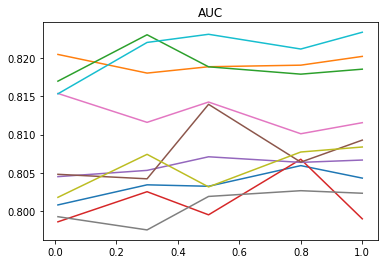

In [100]:
from matplotlib import pyplot as plt

plt.title("AUC")
plt.plot (lr_auc['C'], roc_aur)

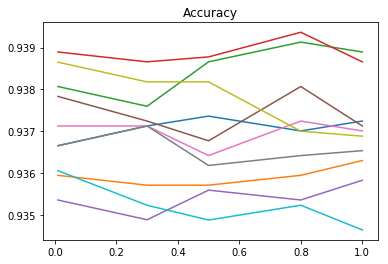

In [109]:
plt.title("Accuracy")
plt.plot (lr_accuracy['C'], roc_accuracy)